## Calculation of  stock beta

$$ \beta_i=\frac{\sigma_{i,M}}{\sigma_M^2} $$

$\beta=1$ stock moves in same market direction \
$0>\beta>1$ stock moves in same market direction, but in less amount

In [38]:
import pandas_datareader.data as reader
import datetime as dt
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import numpy as np

In [2]:
# Define time frame and stock and bench mark, bench mark here is S&P500 
end=dt.datetime.now()
start=dt.date(end.year-5, end.month, end.day)
Input=['MSFT', '^GSPC']

In [3]:
df = reader.get_data_yahoo(Input, start, end)['Adj Close']

In [4]:
df

Symbols,MSFT,^GSPC
Date,,
2015-12-22,50.508629,2038.969971
2015-12-23,50.937519,2064.290039
2015-12-24,50.800640,2060.989990
2015-12-28,51.056156,2056.500000
2015-12-29,51.603676,2078.360107
...,...,...
2020-12-16,219.279999,3701.169922
2020-12-17,219.419998,3722.479980
2020-12-18,218.589996,3709.409912


In [5]:
# Calculate monthly return
mtl_return = df.resample('M').ffill().pct_change()

In [7]:
mtl_return = mtl_return.dropna(axis=0)
mtl_return

Symbols,MSFT,^GSPC
Date,,
2016-01-31,-0.007030,-0.050735
2016-02-29,-0.069789,-0.004128
2016-03-31,0.085495,0.065991
2016-04-30,-0.097049,0.002699
2016-05-31,0.070197,0.015325
2016-06-30,-0.034528,0.000911
2016-07-31,0.107680,0.035610
2016-08-31,0.020080,-0.001219
2016-09-30,0.002436,-0.001234


Build a linear regression model
$$Y_y=\beta_0+\beta_1X_i+\epsilon_i$$
CAPM terms
$$r_{i,t}=\alpha+\beta_{M,t}+\epsilon$$

In [9]:
# Independent variable X in CAPM terms is equal to our monthly market return
X= mtl_return['^GSPC']
# Dependent variable Y in CAPM terms is equal to monthly asset return
y=mtl_return['MSFT']
# add the intersect variable to stats model
X_sm = sm.add_constant(X)
# define model using ordinary least square approach
model = sm.OLS(y, X_sm)

In [10]:
# fit model
results = model.fit()

In [11]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MSFT   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     52.83
Date:                Tue, 22 Dec 2020   Prob (F-statistic):           1.04e-09
Time:                        20:02:01   Log-Likelihood:                 111.22
No. Observations:                  60   AIC:                            -218.4
Df Residuals:                      58   BIC:                            -214.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0174      0.005      3.398      0.001       0.007       0.028
^GSPC          0.8312      0.114      7.268      0.000       0.602       1.060
==============================================================================
Omnibus:                        2.611   Durbin-Watson:                   2.680
Prob(Omnibus):                  0.271   Jarque-Bera (JB):                1.745
Skew:                          -0.327   Prob(JB):                        0.418
Kurtosis:                       3.521   Cond. No.                         23.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

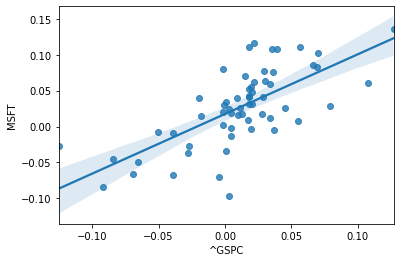

In [19]:
#Visualize results, ci = confidence interval
sns.regplot(x='^GSPC', y='MSFT', data=mtl_return, ci=95)
plt.show()

### Considering risk free rate
$$r_{i,t}-r_{f,t}=\alpha +\beta(r_{M,t}-r_{f,t})+\epsilon_t$$

In [24]:
#Getting risk free rate from Fama French
rf=reader.DataReader('F-F_Research_Data_Factors','famafrench', start, end)[0].RF
rf = rf[1:]

In [42]:
#adding missing Nov and Dec data
rf = np.append(rf.values, [0.01,0.01])

In [48]:
#Calculate excess return by substracting the risk free rate from the asset and market return
mtl_return['MSFT-rf']=mtl_return['MSFT']-rf
mtl_return['^GSPC-rf']=mtl_return['^GSPC']-rf

D:\miniconda3\envs\UdacityEnv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\miniconda3\envs\UdacityEnv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [49]:
mtl_return.head()

Symbols,MSFT,^GSPC,MSFT-rf,^GSPC-rf
Date,,,,
2016-01-31,-0.007030,-0.050735,-0.017030,-0.060735
2016-02-29,-0.069789,-0.004128,-0.089789,-0.024128
2016-03-31,0.085495,0.065991,0.065495,0.045991
2016-04-30,-0.097049,0.002699,-0.107049,-0.007301
2016-05-31,0.070197,0.015325,0.060197,0.005325


In [50]:
#Building regression model again
X=mtl_return['^GSPC-rf']
y=mtl_return['MSFT-rf']

In [51]:
X_sm=sm.add_constant(X)

In [52]:
model= sm.OLS(y, X_sm)
results = model.fit()

In [53]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                MSFT-rf   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     259.5
Date:                Tue, 22 Dec 2020   Prob (F-statistic):           4.47e-23
Time:                        20:32:33   Log-Likelihood:                 111.98
No. Observations:                  60   AIC:                            -220.0
Df Residuals:                      58   BIC:                            -215.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0072      0.007      1.099      0.276      -0.006       0.020
^GSPC-rf       0.8931      0.055     16.108      0.000       0.782       1.004
==============================================================================
Omnibus:                        0.993   Durbin-Watson:                   2.728
Prob(Omnibus):                  0.609   Jarque-Bera (JB):                0.405
Skew:                          -0.120   Prob(JB):                        0.817
Kurtosis:                       3.323   Cond. No.                         11.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

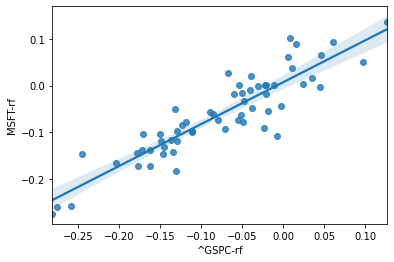

In [54]:
sns.regplot(x='^GSPC-rf', y='MSFT-rf', data=mtl_return)
plt.show()

In [63]:
np.log(150000/80000)/np.log(1.3)

2.39593856540727

In [64]:
100000*1.3**3.5

250496.54089428065